In [26]:
import librosa
import IPython.display as ipd
# Load the audio file
file_path = 'my_audio.wav'
voice_signal, sampling_rate = librosa.load(file_path, sr=None)
ipd.Audio(file_path)

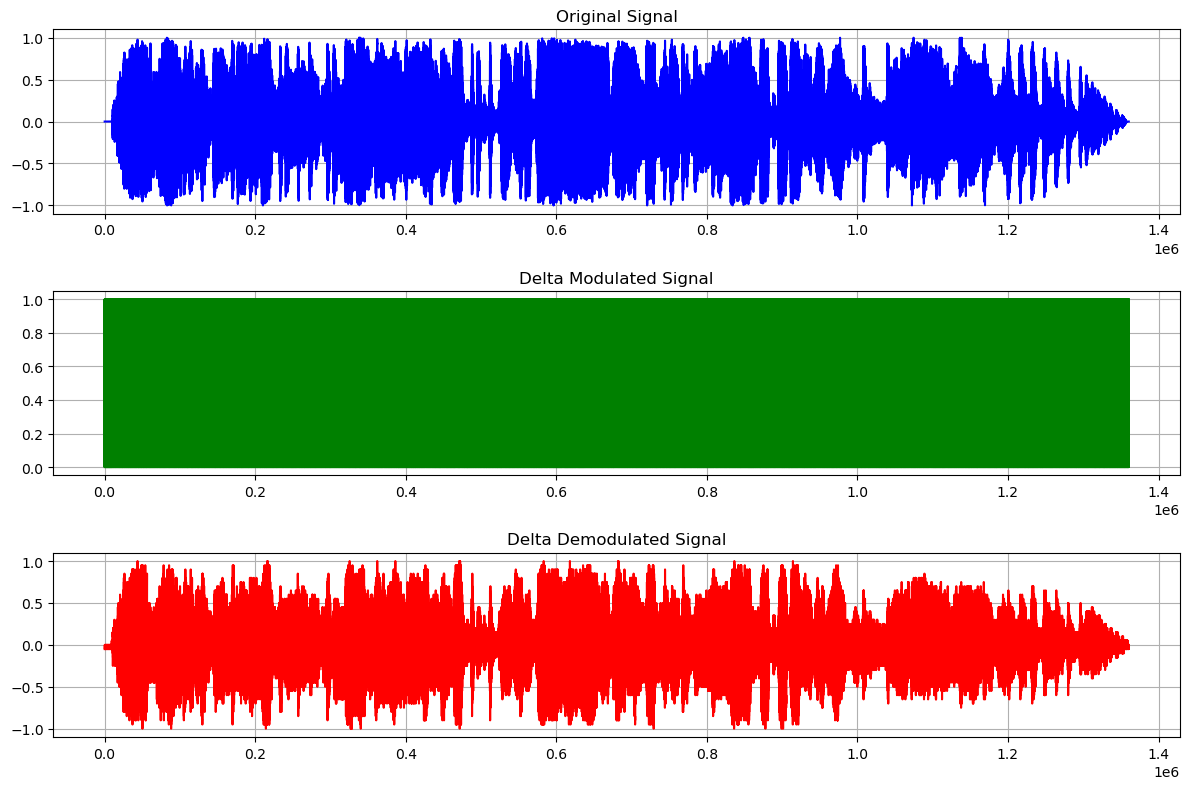

Signal-to-Noise Ratio (SNR): 8.124101853017825 dB


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Load the audio file
file_path = 'my_audio.wav'
  # Update this with your file path
voice_signal, sampling_rate = librosa.load(file_path, sr=None)

# Delta Modulation (DM)
def delta_modulate(signal, step_size):
    modulated = []
    predicted_signal = 0
    for sample in signal:
        # Compare current sample to predicted sample
        if sample > predicted_signal:
            modulated.append(1)
            predicted_signal += step_size
        else:
            modulated.append(0)
            predicted_signal -= step_size
    return np.array(modulated)

# Step size for delta modulation
step_size = 0.05

# Perform delta modulation
modulated_signal = delta_modulate(voice_signal, step_size)


# Delta Demodulation
def delta_demodulate(modulated_signal, step_size):
    demodulated = []
    predicted_signal = 0
    for bit in modulated_signal:
        if bit == 1:
            predicted_signal += step_size
        else:
            predicted_signal -= step_size
        demodulated.append(predicted_signal)
    return np.array(demodulated)

# Demodulate the signal
demodulated_signal = delta_demodulate(modulated_signal, step_size)

# Plot the original and demodulated signals for comparison
plt.figure(figsize=(12, 8))

# Plot the original signal
plt.subplot(3, 1, 1)
plt.plot(voice_signal, color='b')
plt.title("Original Signal")
plt.grid(True)

# Plot the modulated signal
plt.subplot(3, 1, 2)
plt.step(range(len(modulated_signal)), modulated_signal, color='g', where='mid')
plt.title("Delta Modulated Signal")
plt.grid(True)

# Plot the demodulated signal
plt.subplot(3, 1, 3)
plt.plot(demodulated_signal, color='r')
plt.title("Delta Demodulated Signal")
plt.grid(True)

plt.tight_layout()
plt.show()

# Signal-to-Noise Ratio (SNR)
def calculate_snr(original, demodulated):
    noise = original - demodulated
    snr = 10 * np.log10(np.sum(original**2) / np.sum(noise**2))
    return snr

snr_value = calculate_snr(voice_signal, demodulated_signal)
print(f"Signal-to-Noise Ratio (SNR): {snr_value} dB")


In [38]:
# Add noise to simulate pre-modulation signal comparison
noise = np.random.normal(0, 0.01, len(voice_signal))
noisy_signal = voice_signal + noise
# Signal-to-Noise Ratio (SNR)
def calculate_snr(original, noisy_version):
    noise = original - noisy_version
    noise_power = np.sum(noise**2)
    if noise_power == 0:
        return np.inf
    snr = 10 * np.log10(np.sum(original**2) / noise_power)
    return snr

# Calculate SNR for noisy signal (before modulation) and demodulated signal
snr_before = calculate_snr(voice_signal, noisy_signal)
snr_after = calculate_snr(voice_signal, demodulated_signal)

print(f"SNR Before Modulation: {snr_before} dB")
print(f"SNR After Modulation and Demodulation: {snr_after} dB")

SNR Before Modulation: 29.023662950733225 dB
SNR After Modulation and Demodulation: 8.124101853017825 dB


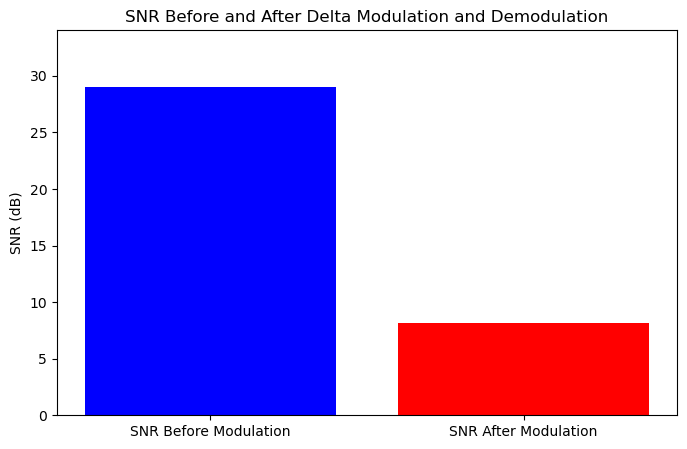

In [44]:
# Plot the SNR values
plt.figure(figsize=(8, 5))
snr_values = [snr_before, snr_after]
labels = ['SNR Before Modulation', 'SNR After Modulation']
plt.bar(labels, snr_values, color=['blue', 'red'])
plt.ylabel('SNR (dB)')
plt.title('SNR Before and After Delta Modulation and Demodulation')
plt.ylim(0, max(snr_values) + 5)
plt.show()